In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [4]:
poly = PolynomialFeatures(degree=2)
# --> x1,x2  --> 1, x1, x2, x1^2 ,x1*x2, x2^2

poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [6]:
X2 = np.arange(9).reshape(3,3)
print(X2)

# 인스턴스 선언할 때 차수를 2로 제한 했기 때문에 총 차수가 2를 넘지 못한다.
poly.fit_transform(X2)  

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

**3차 다항식을 구하기**

In [7]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    
    print(X[:,0])
    print(X[:,1])
    return y

X = np.arange(0,4).reshape(2,2)
print(f'일차 단항식 계수 :\n{X}')
y = polynomial_func(X)
print(f'삼차 다항식 결정값 :\n{y}')


일차 단항식 계수 :
[[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값 :
[  5 125]


**3차 다항식 계수의 피처값과 3차 다항식의 결정값**

In [9]:
from sklearn.linear_model import LinearRegression

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print(f'3차 다항식 계수 feature :\n{poly_ftr}')

# Linear Regression에 3차 다항식 계수와 3차 다항식 결정값으로 학습후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)

print(f'Polynomial 회귀 계수 :\n{np.round(model.coef_,2)}')
print(f'Polynomial 회귀 Shape :\n{model.coef_.shape}')


3차 다항식 계수 feature :
[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 :
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape :
(10,)


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))


Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### 가상 데이터 생성 및 다항 회귀 추정

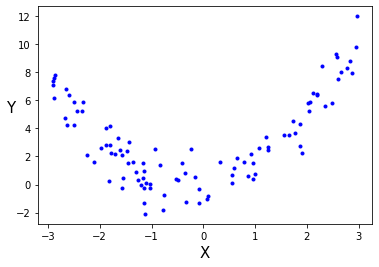

In [16]:
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5*X + X**2 +np.random.randn(m,1)

plt.plot(X,y,'b.')
plt.ylabel('Y', fontsize=15, rotation=0)
plt.xlabel('X', fontsize=15, rotation=0)
plt.show()

In [17]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([0.00940183]), array([[0.49918512, 1.00409594]]))

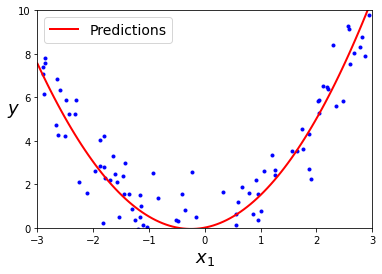

In [19]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()


### 보스턴 주택가격 다항회귀 적용

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

In [21]:
# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data, y_target,
                                                       test_size=0.3, random_state=156)

Boston 데이타셋 크기 : (506, 14)


In [22]:
## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
## 'poly' : 첫번째 스탭의 이름(변수명처럼 직접 만들어 지어줌)
## 'linear' : 두번째 스탭의 이름두번째 스탭의 이름

p_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression())])

In [23]:
p_model.fit(X_train, y_train)

# linear스텝의 속성 coef_를 반환
print('Polynomial 회귀 계수\n', np.round(p_model.named_steps['linear'].coef_, 2))

y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Polynomial 회귀 계수
 [ 1.0906374e+09 -8.1400000e+00 -1.0000000e-01 -7.0000000e+00
  3.6980000e+01  2.5363000e+02  3.0970000e+01  1.0900000e+00
 -1.2020000e+01  3.1000000e+00 -6.0000000e-02  7.7500000e+00
  2.0000000e-02  4.6000000e-01 -0.0000000e+00  2.7000000e-01
  6.8000000e-01  1.8600000e+00 -1.2000000e-01  9.0000000e-02
  0.0000000e+00 -2.0000000e-01  5.8000000e-01 -6.0000000e-02
  8.7000000e-01 -0.0000000e+00  4.0000000e-02 -0.0000000e+00
 -2.0000000e-02 -1.7000000e-01 -2.0900000e+00 -2.0000000e-02
  0.0000000e+00 -2.0000000e-02  1.0000000e-02  0.0000000e+00
 -2.0000000e-02  0.0000000e+00 -1.0000000e-02  5.0000000e-02
 -4.9000000e-01 -9.0000000e-02  2.9000000e-01  1.0000000e-02
  2.1000000e-01 -5.0000000e-02  0.0000000e+00 -3.0000000e-02
  1.0000000e-02 -1.0000000e-02  3.6980000e+01 -2.9240000e+01
 -5.9500000e+00 -5.0000000e-02  1.7700000e+00 -2.0000000e-02
  3.0000000e-02 -1.9000000e+00  2.0000000e-02 -1.3000000e-01
 -7.7010000e+01 -5.0600000e+00 -5.1000000e-01  2.2740000e+01
 -4.96

In [24]:
# 2차 다항식을 해서 피처가 13개에서 104개로 늘어남
# 다항식 값이 높아질 수록 오버피팅을 급격하게 진행하고 오차가 늘어나게 된다.
# 다항식을 쓸때는 degree에 대해 주의 행 함
X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

In [25]:
## include_bias 튜닝
## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                   ('linear', LinearRegression())])

In [26]:
p_model.fit(X_train, y_train)

y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 15.556 , RMSE : 3.944
Variance score : 0.782
